In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# toy dataset

x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

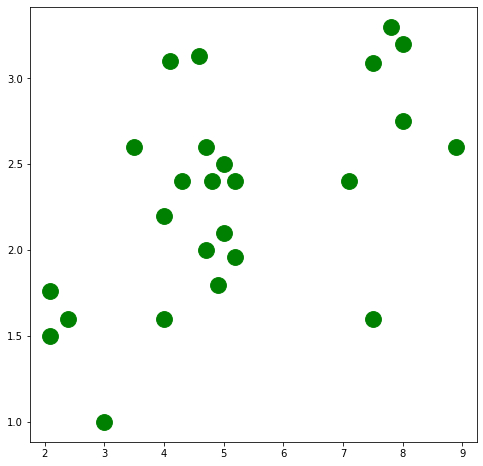

In [3]:
# visualizing the toy dataset
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.show()

In [4]:
# Converting to torch tensors
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [5]:
x.size()

torch.Size([25, 1])

In [6]:
# details of our neural network
inp = 1
hidden = 5
out = 1

In [7]:
# defining the model
'''
Sequential because layers are applied in sequence to 
the 
input that we feed into this model
'''
model = torch.nn.Sequential(
            torch.nn.Linear(inp, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, out))

In [9]:
# calculating the loss of the model
loss_fn = torch.nn.MSELoss(reduction='sum')

In [10]:
# traing the neural network

learning_rate = 1e-4

for i in range(500):
    # code here
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad()    # zero out the gradients for our model
    loss.backward()      # calculating fresh gradients
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 77.27240753173828
1 41.75891876220703
2 26.00413703918457
3 18.547771453857422
4 14.879658699035645
5 13.029394149780273
6 12.079418182373047
7 11.584641456604004
8 11.323246002197266
9 11.182668685913086
10 11.105058670043945
11 11.06042194366455
12 11.03311538696289
13 11.01494026184082
14 11.0015869140625
15 10.990784645080566
16 10.981340408325195
17 10.972618103027344
18 10.964284896850586
19 10.956161499023438
20 10.948156356811523
21 10.94022274017334
22 10.932328224182129
23 10.924461364746094
24 10.916617393493652
25 10.908790588378906
26 10.90097713470459
27 10.893178939819336
28 10.885391235351562
29 10.877615928649902
30 10.869855880737305
31 10.862106323242188
32 10.854368209838867
33 10.846643447875977
34 10.838932037353516
35 10.831233024597168
36 10.823545455932617
37 10.81586742401123
38 10.808205604553223
39 10.800552368164062
40 10.792914390563965
41 10.785285949707031
42 10.777671813964844
43 10.770068168640137
44 10.762476921081543
45 10.754897117614746
46 10.747

In [11]:
# prediction on our training data
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0657],
        [1.3292],
        [2.9623],
        [2.8342],
        [1.9376],
        [3.0584],
        [3.4107],
        [2.2258],
        [2.0305],
        [1.2331],
        [3.1225],
        [2.1618],
        [2.9623],
        [2.1618],
        [1.8415],
        [3.1225],
        [2.2258],
        [2.1297],
        [1.5213],
        [2.0657],
        [1.8415],
        [2.0977],
        [1.6814],
        [1.2331],
        [1.8735]], grad_fn=<AddmmBackward0>)

In [12]:
predicted = predicted_in_tensor.detach().numpy()    # detaching the tensor from the computation graph
predicted

array([[2.0656843],
       [1.3291501],
       [2.9623349],
       [2.8342419],
       [1.9375917],
       [3.0584047],
       [3.4106605],
       [2.2258005],
       [2.030459 ],
       [1.2330803],
       [3.122451 ],
       [2.1617541],
       [2.9623349],
       [2.1617541],
       [1.841522 ],
       [3.122451 ],
       [2.2258005],
       [2.129731 ],
       [1.5212895],
       [2.0656843],
       [1.841522 ],
       [2.0977077],
       [1.6814057],
       [1.2330803],
       [1.873545 ]], dtype=float32)

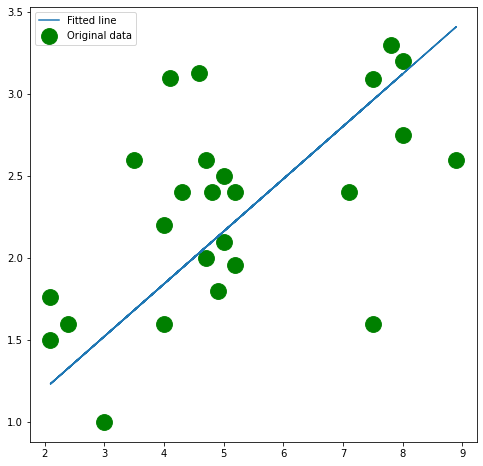

In [13]:
# visualization of the predicted output

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()